hypothesis space complexity demonstration

<ipython-input-3-f88cf44fff75>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(theta[i] * X**i for i in range(len(theta)))


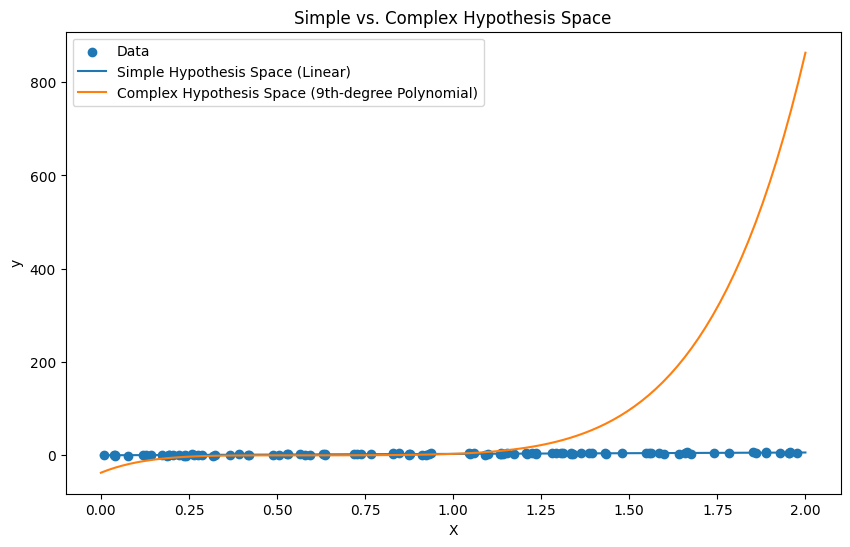

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

# Simple Hypothesis Space (e.g., linear model)
def simple_hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

# Complex Hypothesis Space (e.g., high-degree polynomial)
def complex_hypothesis(X, theta):
    # Using a 9th-degree polynomial
    return np.sum(theta[i] * X**i for i in range(len(theta)))

# Fit the models
theta_simple = np.polyfit(X.flatten(), y.flatten(), 1)
theta_complex = np.polyfit(X.flatten(), y.flatten(), 9)

# Generate predictions
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_simple = simple_hypothesis(X_test, theta_simple[1], theta_simple[0])
y_complex = complex_hypothesis(X_test, theta_complex)

# Plot the data and models
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_simple, label='Simple Hypothesis Space (Linear)')
plt.plot(X_test, y_complex, label='Complex Hypothesis Space (9th-degree Polynomial)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple vs. Complex Hypothesis Space')
plt.show()

hypothesis space complexity using a classification problem with a simple and complex hypothesis space.

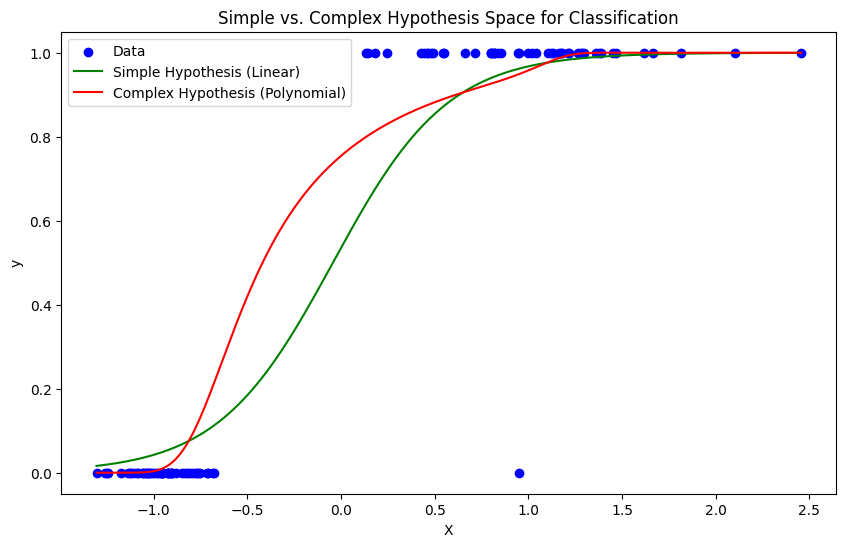

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Simple Hypothesis Space (Linear)
model_simple = LogisticRegression()
model_simple.fit(X, y)

# Complex Hypothesis Space (Polynomial)
model_complex = make_pipeline(PolynomialFeatures(10), LogisticRegression())
model_complex.fit(X, y)

# Generate a range of X values for plotting
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predictions
y_pred_simple = model_simple.predict_proba(X_plot)[:, 1]
y_pred_complex = model_complex.predict_proba(X_plot)[:, 1]

# Plot the data and decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_pred_simple, color='green', label='Simple Hypothesis (Linear)')
plt.plot(X_plot, y_pred_complex, color='red', label='Complex Hypothesis (Polynomial)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple vs. Complex Hypothesis Space for Classification')
plt.show()
